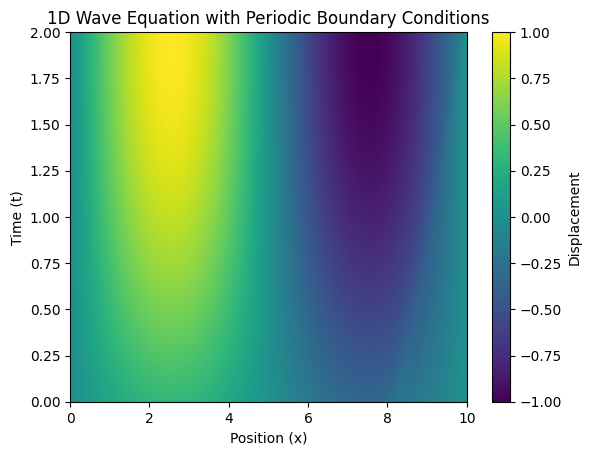

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10.0  # Length of the domain
T = 1.0   # Total simulation time
c = 1.0   # Wave speed
Nx = 100  # Number of spatial grid points
Nt = 500  # Number of time steps
dx = L / (Nx - 1)
dt = T / Nt

# Initialize arrays
x = np.linspace(0, L, Nx, endpoint=False)  # Spatial grid
u = np.zeros((Nt, Nx))  # Solution array

# Initial conditions
u[0, :] = np.sin(2 * np.pi * x / L)  # Initial displacement
u[1, :] = u[0, :]  # First time step (forward Euler)

# Finite difference scheme
for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = 2 * u[n, i] - u[n - 1, i] + (c**2) * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) * (dt**2) / (dx**2)

# Plot the results
plt.imshow(u, extent=[0, L, 0, T], aspect='auto', cmap='viridis')
plt.colorbar(label='Displacement')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('1D Wave Equation with Periodic Boundary Conditions')
plt.show()



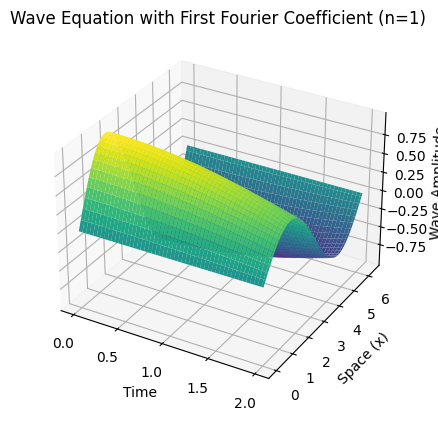

In [ ]:
def wave_equation_coefficient_1(t, x, L):
    n = 1  # first Fourier coefficient
    a_n = 0  # Assuming no cosine term for simplicity
    b_n = 1  # Adjust this coefficient as needed

    wave_value = b_n * np.sin(n * x) * np.cos((n * np.pi * t) / L)
    return wave_value

def main():
    L = 2 * np.pi  # Period of the wave
    t_values = np.linspace(0, 2, 100)  # Time values
    x_values = np.linspace(0, L, 100)  # Spatial values

    # Calculate wave values at different time and spatial points
    wave_values = np.zeros((len(t_values), len(x_values)))
    for i, t in enumerate(t_values):
        for j, x in enumerate(x_values):
            wave_values[i, j] = wave_equation_coefficient_1(t, x, L)

    # Plot the wave
    T, X = np.meshgrid(t_values, x_values)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, X, wave_values.T, cmap='viridis')
    ax.set_xlabel('Time')
    ax.set_ylabel('Space (x)')
    ax.set_zlabel('Wave Amplitude')
    plt.title('Wave Equation with First Fourier Coefficient (n=1)')
    plt.show()

if __name__ == "__main__":
    main()
